In [ ]:
!pip install -U future -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from __future__ import print_function,division

In [ ]:
from builtins import range, input

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.layers import Dropout, BatchNormalization, Activation
from keras.regularizers import l2
from keras.optimizers import SGD, Adam

In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/recomendacao/ratings_small.csv")

In [ ]:
N = ratings.userId.max() + 1 #Número de usuários
M = ratings.movieId.max() + 1 #Número de filmes

In [ ]:
ratings = shuffle(ratings)
corte = int(0.8*len(ratings))
ratings_train = ratings.loc[:corte]
ratings_teste = ratings.loc[corte:]

In [ ]:
K = 10
mean = ratings.rating.mean()
epochs = 10

In [ ]:
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(N,K)(u) #(N, 1, K)
m_embedding = Embedding(M,K)(u) #(N, 1, K)
# Precisando fazer o Flatten pois a rede neural espera um input 2D
u_embedding = Flatten()(u_embedding) #(N,K)
m_embedding = Flatten()(m_embedding) # (N,K)

In [ ]:
x = Concatenate()([u_embedding, m_embedding]) #(N, 2K)

In [ ]:
#Rede Neural
x = Dense(400)(x)
x = Activation('relu')(x)
x = Dense(1)(x)

In [ ]:
model = Model(inputs=[u,m], outputs = x)
model.compile(
    loss='mse',
    optimizer=SGD(lr=0.01, momentum=0.9),
    metrics=['mse'],
)

In [ ]:
r = model.fit(
    x = [ratings_train.userId.values, ratings_train.movieId.values],
    y = ratings_train.rating.values - mean,
    epochs = epochs,
    batch_size=128,
    validation_data=(
        [ratings_teste.userId.values, ratings_teste.movieId.values],
        ratings_teste.rating.values - mean
    )
)

Epoch 1/10
756/756 [==============================] - 3s 3ms/step - loss: 0.9629 - mse: 0.9629 - val_loss: 0.9359 - val_mse: 0.9359
Epoch 2/10
756/756 [==============================] - 2s 2ms/step - loss: 0.8944 - mse: 0.8944 - val_loss: 0.8979 - val_mse: 0.8979
Epoch 3/10
756/756 [==============================] - 2s 2ms/step - loss: 0.8874 - mse: 0.8874 - val_loss: 0.8974 - val_mse: 0.8974
Epoch 4/10
756/756 [==============================] - 2s 3ms/step - loss: 0.8851 - mse: 0.8851 - val_loss: 0.8966 - val_mse: 0.8966
Epoch 5/10
756/756 [==============================] - 2s 2ms/step - loss: 0.8846 - mse: 0.8846 - val_loss: 0.9111 - val_mse: 0.9111
Epoch 6/10
756/756 [==============================] - 2s 2ms/step - loss: 0.8831 - mse: 0.8831 - val_loss: 0.8933 - val_mse: 0.8933
Epoch 7/10
756/756 [==============================] - 2s 2ms/step - loss: 0.8825 - mse: 0.8825 - val_loss: 0.9022 - val_mse: 0.9022
Epoch 8/10
756/756 [==============================] - 2s 2ms/step - loss: 0.

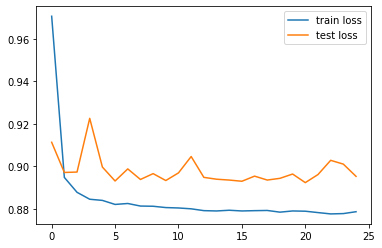

In [ ]:
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="test loss")
plt.legend()
plt.show()